# Relatório de Laboratório

## Física Aplicada à Computação

### Licenciatura em Engenharia Informática - 1º Ano / 1º Semestre

#### Ano Lectivo 2022-23

#### Docente: Nuno S. A. Pereira

##### _Departamento de Matemática e Ciências Físicas_

### Autor:

#### Fábio Gonçalves (N.º 17646)

# Introdução
Este projeto de laboratório da unidade curricular de Física Aplicada à Computação (FAC), consiste em colocar à prova conhecimentos e práticas previamente desenvolvidas ao longo das aulas da unidade currícular.\
Este laboratório consiste na seguinte cadeia de operações:
* Aquisição de dados gerados pelo Arduino;
* Limpeza dos dados;
* Visualização na forma de gráficos (séries temporais, histogramas e correlações);
* Cálculo de indicadores de estatística descritiva.

Este laboratório consiste no desenvolvimento de duas tarefas:
* **Tarefa 1:** Leitura e tratamento de dados gerados pelo Arduino e desenvolvidos em Python;
* **Tarefa 2:** Leitura e tratamento de dados gerados por um ficheiro .txt fornecido pelo docente da unidade curricular.

Importar todas as libraries que serão utilizados no desenvolvimento deste laboratório e verificar que se encontram em funcionamento.

In [113]:
import sys
import serial
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd                 # pip install pandas
import tabulate                     # pip install tabulate

Verificar a disponibilidade da porta COM e a abertura da comunicação com a porta serial.

In [114]:
print('Porta COM disponível:')
!python -m serial.tools.list_ports

Porta COM disponível:
COM3                


1 ports found


Abrir comunicação com a porta COM que foi identificada anteriormente.

In [117]:
ser = serial.Serial()
ser.baudrate = 115200  
ser.port = 'COM3'      # SUBSTITUIR PELA PORTA ENCONTRADA ANTERIORMENTE
ser.timeout = 2000

print('\nInformação sobre a conexão:')
print("Connexão à porta " + ser.portstr + "\n")
print('Configuração da porta:\n\tBaudrate: {0}\n\tParity Bits: {1}\n\tByte size: {2}\n\tStop bits: {3}:\n\tTimeout: {4}'.
      format(ser.baudrate, ser.parity, ser.bytesize, ser.stopbits, ser.timeout))


Informação sobre a conexão:
Connexão à porta COM3

Configuração da porta:
	Baudrate: 115200
	Parity Bits: N
	Byte size: 8
	Stop bits: 1:
	Timeout: 2000


## Parte 1 - Arduino Uno: dados sintéticos

### Objetivo
Esta primeira tarefa tem como objetivo fazer com que o Arduino Nano 33 BLE gere um sinal sinusoidal com ruído aleatório, de acordo com a seguinte equação:
\begin{align}
f(t)=A_0+A_1.sin(w t)+R.random(-1,1)
\end{align}
$t$: Tempo.\
$A_0$: Linha base.\
$A_1$: Amplitude da sinusóide.\
$w = \frac{2\pi}{P}$: Velocidade angular.\
$P$: Período.\
$R$: Amplitude do ruído.\
$random(-1,1)$: Função que gera uma distribuição uniforme pseudo-aleatória entre -1 e 1.

O sketch representado em Arduino deverá porém, escrever para o Serial Monitor o par de valores ($t$, $f(t)$).

### **1.** Leitura e tratamento dos dados gerados pelo Arduino
O código Python abaixo irá efetuar a leitura dos dados enviados pelo Arduino e através da variável $N$ será o feito o número de iterações equivalente ao valor da mesma, em que irá percurrer a função que contém a equações desta primeira tarefa e irá executá-la $N$ vezes. 

In [138]:

N = 200 #número de iterações de aquisição pretendidas

if not ser.is_open:
    print("A conexão vai ser aberta.\n")
    ser.open()

i = "start"

ser.write(i.encode())

data = []
count = 0

print('Em aquisição de dados...')

task = True

while task:

    s = str(ser.readline())
    val = s[2:-5]
    if ('end' not in val or 'nd' not in val):   # Para além da excepção de não entrar na linha que contenha a string 'end' fornecida pelo docente, decidi colocar também 'nd' visto que o 
                                                    # código muitas das vezes excluía o character 'e' de 'end' o que originava alguns erros na compilação
        data.append(val.split(' '))             # Armazenados os valores da linha lida e feita a separação por espaços (' '), de cada um dos valores 
    else:
        count +=1
        
    if (count == N):
        print("\nDados da aquisição de {:n} séries obtidos com sucesso.".format(N))
        task = False

t_array = [] #array que irá guardar cada valor de 't'
f_array = [] #array que irá guardar cada valor de 'f(t)'
ruido_array = []


for x in data:                          # Ciclo 'for' que irá percorrer o array 'data' em que 'x' será o valor de cada linha da posição de data
    t = x[2]                            # Guardar na variável 't' o valor da variável 'x' na posição correta para obter apenas o valor de 't', neste caso é a posição [2]
    t_array.append(float(t))            # Armazenar no array 't_array' o valor obtido anteriormente da variável 't' em que será convertido também de string para float
    f = x[7]                            # Guardar na variável 'f' o valor da variável 'x' na posição correta para obter apenas o valor de 'f(t)', neste caso é a posição [7]
    f_array.append(float(f))            # Armazenar no array 'f_array' o valor obtido anteriormente da variável 'f' em que será convertido também de string para float
    ruido = x[12]                       # Guardar na variável 'ruido' o valor da variável 'x' na posição correta para obter apenas o valor de 'ruido', neste caso é a posição [12]
    ruido_array.append(float(ruido))    # Armazenar no array 'ruido_array' o valor obtido anteriormente da variável 'ruido' em que será convertido também de string para float

ser.close()



A conexão vai ser aberta.

Em aquisição de dados...

Dados da aquisição de 200 séries obtidos com sucesso.


### Resultados

### **2.** Visualização dos dados adquiridos enviados pelo Arduino, via comunicação de porta série
São agora representados os dados que foram obtidos anteriormente via comunicação de porta série do Arduino e foram então guardados em dois arrays que serão seguidamente apresentados:
* **t_array:** Array que contém os dados obtidos de $ t $;
* **f_array:** Array que contém os dados obtidos de $ f(t) $.

In [139]:
print("t:")
print(t_array)
print("\nf(t):")
print(f_array)

t:
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11, 2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.02, 3.12, 3.22, 3.32, 3.42, 3.52, 3.62, 3.72, 3.82, 3.92, 4.02, 4.12, 4.22, 4.32, 4.42, 4.52, 4.62, 4.72, 4.82, 4.92, 5.03, 5.13, 5.23, 5.33, 5.43, 5.53, 5.63, 5.73, 5.83, 5.93, 6.03, 6.13, 6.23, 6.33, 6.43, 6.53, 6.63, 6.73, 6.83, 6.93, 7.04, 7.14, 7.24, 7.34, 7.44, 7.54, 7.64, 7.74, 7.84, 7.94, 8.04, 8.14, 8.24, 8.34, 8.44, 8.54, 8.64, 8.74, 8.84, 8.94, 9.05, 9.15, 9.25, 9.35, 9.45, 9.55, 9.65, 9.75, 9.85, 9.95, 10.05, 10.15, 10.25, 10.35, 10.45, 10.55, 10.65, 10.75, 10.85, 10.95, 11.06, 11.16, 11.26, 11.36, 11.46, 11.56, 11.66, 11.76, 11.86, 11.96, 12.06, 12.16, 12.26, 12.36, 12.46, 12.56, 12.66, 12.76, 12.86, 12.96, 13.07, 13.17, 13.27, 13.37, 13.47, 13.57, 13.67, 13.77, 13.87, 13.97, 14.07, 14.17, 14.27, 14.37, 14.47, 14.57, 14.67, 14.77, 14.87, 14.97, 15.08, 15.18, 15.28, 15.38, 15.48, 15.58, 15.68, 15.78, 15.88

### **3.** Armazenamento dos dados lidos no ponto anterior para um ficheiro designado por "dados_raw.txt"

In [149]:
import pathlib

count = 0

txtFile = open('dados_raw.txt', 'w')        # Ficheiro "dados_raw.txt" guardado na localização onde se encontra este ficheiro de Jupyter Notebook ('fac-lab_17646.ipynb')

txtFile.writelines("Dados ({:n})".format(N))
txtFile.writelines("\nt\tf(t)")
for x in data:
    txtFile.writelines('\n')
    txtFile.writelines(str(t_array[count]) + " , " + str(f_array[count]))
    count += 1

print("Dados Guardados com Sucesso no ficheiro 'dados_raw.txt'")
print("Caminho: ", pathlib.Path().resolve())    # Mostrar localização onde o ficheiro será guardado por default, na máquina do utilizador atual
txtFile.close()

Dados Guardados com Sucesso no ficheiro 'dados_raw.txt'
Caminho:  C:\Users\fabix\Desktop\FAC\Trabalho


### Tratamento de Dados

### **4.** Visualização gráfica dos dados adquiridos

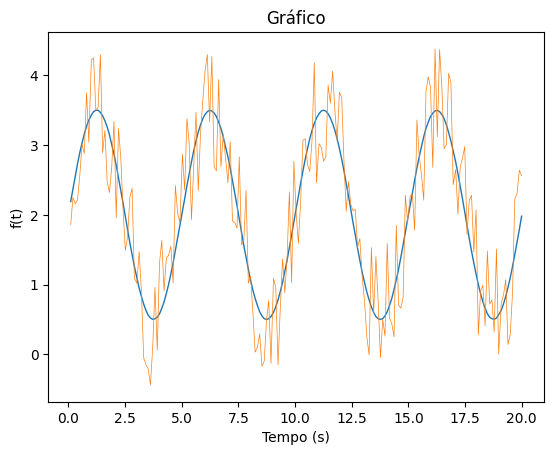

In [140]:
plt.ylabel("f(t)")
plt.xlabel("Tempo (s)")
plt.title("Gráfico")
plt.plot(t_array, f_array, linewidth=1)
plt.plot(t_array, ruido_array, linewidth=0.5)
plt.show()

### **5.** Cálculo das grandezas básicas e estatística descritiva
Realizados cálculos básicos de estatística descritiva dos dados recebidos pelo Arduino em termos das seguintes grandezas:  
* Mínimo;
* Máximo;
* Média;
* Mediana;
* Desvio padrão. 

In [123]:
from tabulate import tabulate       # pip install tabulate

f_max = f_array[0]
ruido_max = ruido_array[0]

f_min = f_array[0]
ruido_min = ruido_array[0]

f_array_sort = []
ruido_array_sort = []

f_sum = 0
ruido_sum = 0

for x in f_array:
    if x > f_max:
        f_max = x
    if x < f_min:
        f_min = x
    f_sum += x
    f_array_sort.append(x)

f_avg = f_sum / len(f_array)
size = len(f_array_sort)
f_array_sort.sort()

for y in ruido_array:
    if y > ruido_max:
        ruido_max = y
    if y < ruido_min:
        ruido_min = y
    ruido_sum += y
    ruido_array_sort.append(y)

ruido_avg = ruido_sum / len(ruido_array)
ruido_array_sort.sort()

if size % 2 == 0:
    f_median_1 = f_array_sort[size//2]
    f_median_2 = f_array_sort[size//2 - 1]
    f_median = (f_median_1 + f_median_2)/2
    ruido_median_1 = ruido_array_sort[size//2]
    ruido_median_2 = ruido_array_sort[size//2 - 1]
    ruido_median = (ruido_median_1 + ruido_median_2)/2
else:
    f_median = f_array_sort[size//2]
    ruido_median = ruido_array_sort[size//2]


print(tabulate({'': ['Mínimo', 'Máximo', 'Média', 'Mediana', 'Desvio Padrão'], 
                'f(t)': [f_min, f_max, f_avg, f_median, np.std(f_array)], 
                'ruído': [ruido_min, ruido_max, ruido_avg, ruido_median, np.std(ruido_array)]}, 
                headers='keys', 
                tablefmt='fancy_grid'))


╒═══════════════╤═════════╤══════════╕
│               │    f(t) │    ruído │
╞═══════════════╪═════════╪══════════╡
│ Mínimo        │ 0.5     │ -0.4     │
├───────────────┼─────────┼──────────┤
│ Máximo        │ 3.5     │  4.46    │
├───────────────┼─────────┼──────────┤
│ Média         │ 1.9998  │  2.01095 │
├───────────────┼─────────┼──────────┤
│ Mediana       │ 1.98    │  2.03    │
├───────────────┼─────────┼──────────┤
│ Desvio Padrão │ 1.06075 │  1.2156  │
╘═══════════════╧═════════╧══════════╛


### **6.** Gráfico com o histograma do sinal
Representação do sinal sinusoidal em histrogamas tanto sem ruído como também com ruído aleatório.

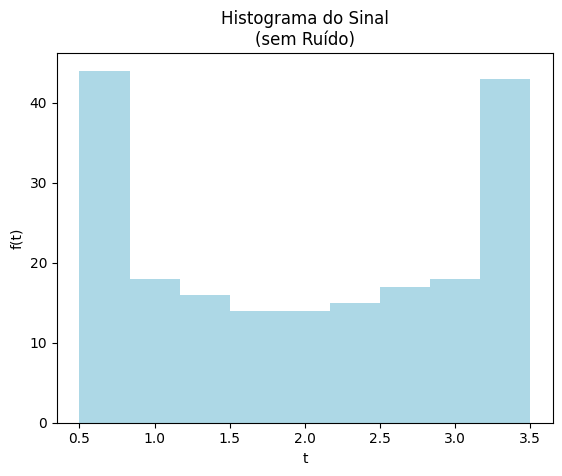

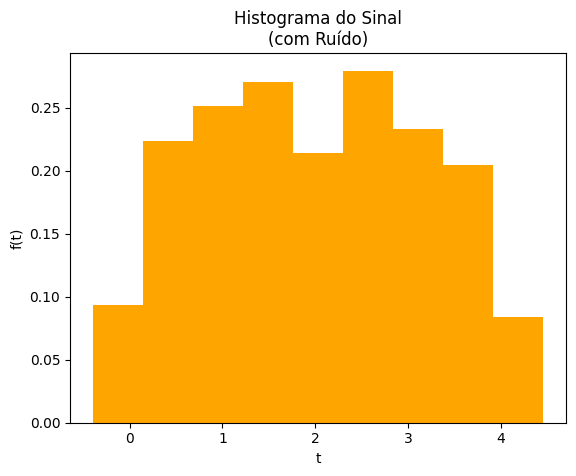

In [125]:
plt.title('Histograma do Sinal\n(sem Ruído)')
plt.xlabel("t")
plt.ylabel('f(t)')
plt.hist(f_array, bins='auto', density=False, facecolor='lightblue', histtype="stepfilled", alpha=1)
plt.show()

plt.title('Histograma do Sinal\n(com Ruído)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.hist(ruido_array, bins='auto', density=True, facecolor='orange', histtype="stepfilled", alpha=1)
plt.show()

### **7.** Escrita de informação para ficheiro
Toda a informação relevante para a caracterização dos dados adquiridos será armazenada para um ficheiro designado por "report.txt".

In [150]:
import pathlib

txtFile = open("report.txt", "w")        # Ficheiro "report.txt" guardado na localização onde se encontra este ficheiro de Jupyter Notebook ('fac-lab_17646.ipynb')

arr_titles = ["Mínimo: ", "Máximo: ", "Média: ", "Mediana: ", "Desvio Padrão: "]
f_values = [f_min, f_max, f_avg, f_median, np.std(f_array)]
ruido_values = [ruido_min, ruido_max, ruido_avg, ruido_median, np.std(ruido_array)]
count = 0

txtFile.writelines("Dados f(t)")
for x in arr_titles:
    txtFile.writelines("\n")
    txtFile.writelines(x + str(f_values[count]))
    count += 1

count = 0

txtFile.writelines("\n")
txtFile.writelines("\nDados ruído")
for x in arr_titles:
    txtFile.writelines("\n")
    txtFile.writelines(x + str(ruido_values[count]))
    count += 1

print("Dados Guardados com Sucesso no ficheiro 'report.txt'")
print("Caminho: ", pathlib.Path().resolve())    # Mostrar localização onde o ficheiro será guardado por default, na máquina do utilizador atual
txtFile.close()

Dados Guardados com Sucesso no ficheiro 'report.txt'
Caminho:  C:\Users\fabix\Desktop\FAC\Trabalho


### Código do Arduino
Código C implementado no Arduino para a realização da primeira tarefa do laboratório.

```c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define SERIAL_MONITOR

void formula(float);
float Random(int, int);

float A_0 = 2;
float A_1 = 1.5;
float P = 5;
float pi = 3.14;
float w = 2*pi/P;
float R = 1;
float to = 0;
float samples = 200;
float tf = 20;
float increment = (tf - to) / (samples - 1);
float t = to;
String start;

void setup() {
  Serial.begin(115200);
  while(!Serial);
}


void loop() {
  if (Serial.available() > 0){
    start = Serial.readStringUntil('\n');
    if (start == "start"){
      t = to;
    }
  }
  if (t < tf){
    t += increment;
  }
  else {
    t = to;
  }
  f(t);
  Serial.println("end");
}

void f(float t){
  float f = A_0 + A_1 * sin(w * t);
  float data_ruido = f + R * Random(-1,1);

#ifdef SERIAL_MONITOR
  Serial.print("t = ");
#endif

  Serial.print(t);

#ifdef SERIAL_MONITOR  
  Serial.print("   f(t) = ");
#endif

  Serial.print(f);
  
#ifdef SERIAL_MONITOR  
  Serial.print("   ruido = ");
#endif

  Serial.print(data_ruido);

  Serial.println();
  delay(200);
}

float Random(int lower, int upper){
  int l = lower * 1000;
  int u = upper * 1000;
  int rnd = random(l,u);
  float rndNum = rnd /1000.0;
  return rndNum;
}
```

## Parte 2 - Arduino Nano: dados reais

### Objetivo
A segunta tarefa deste laboratório consiste nos seguintes objetivos:
* Repetir alguns requisitos realizados na primeira tarefa, para valores que se encontram num ficheiro de dados, fornecido pelo docente da unidade curricular, gerados pelo Arduino Nano 33 BLE Sense. Os dados que se encontram nesse ficheiro são:
    * Temperatura do ar, obtida por dois sensores:
        * **T1**;
        * **T2**.
    * Pressão atmosférica (**P**);
    * Humidade relativa (**HR**).
* Gerar gráficos que permitam visualizar potenciais correlações entre as grandezas adquiridas:
    * (**T1**, **T2**);
    * (**T1**, **P**);
    * (**T1**, **HR**).

### **8.** Leitura do ficheiro de dados
Neste ponto é feita a leitura do ficheiro de dados "data_nano.txt" e cada valor correspondente a temperatura, pressão e humidade serão armazenados em arrays para a sua representação graficamente nos pontos seguintes.

In [127]:
txtFile2 = open('data_nano.txt', 'r')      # Leitura do ficheiro "data_nano.txt" na localização onde se encontra este ficheiro de Jupyter Notebook ('fac-lab_17646.ipynb')

f = txtFile2.readlines()

data_nano = []
time_array = []
hr = []
t1 = []
t2 = []
p = []


for y in f:
    line = y.strip()                       # Excluir os '\n' do fim de cada linha
    if '#' not in line :                   # Não incluir as linhas que contenham o caracter '#' (neste caso as duas primeiras linhas do ficheiro)
        data_nano.append(line.split(' '))  # Adicionar cada valor da linha separados por um espaço (' '), por exemplo ['12:06:01.429', '->', '79.39', '17.83', '1008.93', '17.83'] 


for pos in data_nano:
    change = pos[0].split('.')
    time_array.append(change[0])
    hr.append(float(pos[2]))
    t1.append(float(pos[3]))
    p.append(float(pos[4]))
    t2.append(float(pos[5]))


print("\n{:n} valores lidos e armazenados com sucesso.".format(len(data_nano)))



4939 valores lidos e armazenados com sucesso.


### **8.1.** Visualização gráfica dos dados adquiridos

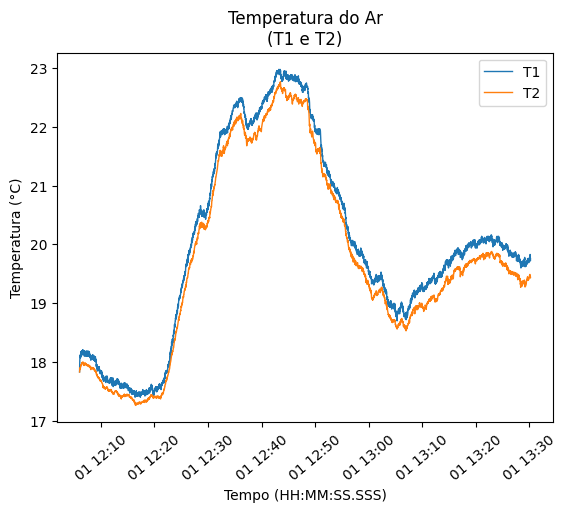

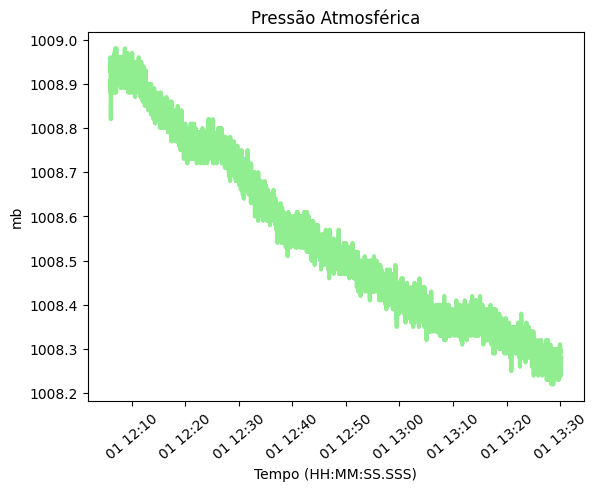

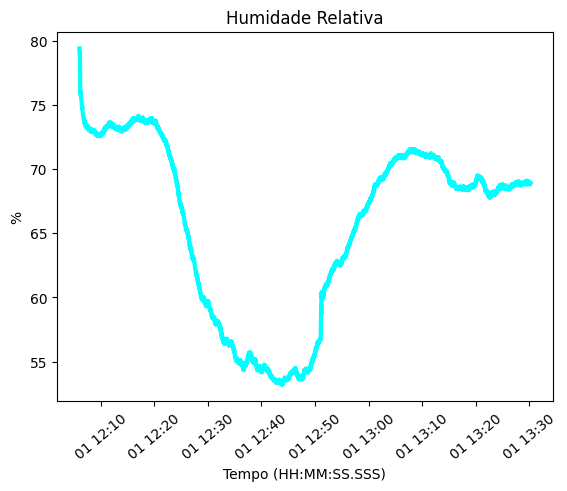

In [148]:
import pandas as pd             # pip install pandas

timeseries_data = { 
    'Time': time_array, 
    'T1': t1,
    'T2' : t2,
    'HR' : hr,
    'P' : p
}

dataframe = pd.DataFrame(timeseries_data,columns=['Time', 'T1', 'T2', 'HR', 'P'])

dataframe["Time"] = pd.to_datetime(dataframe["Time"], format="%H:%M:%S")

dataframe = dataframe.set_index("Time")

data_test = []
count = 0

for x in t1:
    data_test.append(x - t2[count])
    count += 1

plt.plot(dataframe["T1"], label='T1', linewidth=1)
plt.plot(dataframe["T2"], label='T2', linewidth=1)

plt.title("Temperatura do Ar\n(T1 e T2)")
C = u"\N{DEGREE SIGN}" + "C"
plt.ylabel("Temperatura ("+C+")")
plt.xlabel("Tempo (HH:MM:SS.SSS)")

plt.legend()
plt.tick_params(axis='x',labelsize=10,rotation=40)
plt.show()

plt.plot(dataframe["P"], linewidth=3, color="lightgreen")

plt.title("Pressão Atmosférica")
plt.ylabel("mb")
plt.xlabel("Tempo (HH:MM:SS.SSS)")

plt.tick_params(axis='x',labelsize=10,rotation=40)
plt.show()

plt.plot(dataframe["HR"], linewidth=3, color="cyan")

plt.title("Humidade Relativa")
plt.ylabel("%")
plt.xlabel("Tempo (HH:MM:SS.SSS)")

plt.tick_params(axis='x',labelsize=10,rotation=40)
plt.show()


### **8.2.** Cálculo das grandezas básicas de estatística descritiva
Nesta segunda tarefa para a realização do cálculo das grandezas básicas de estatística descritiva (**mínimo, máximo, média, mediana e desvio padrão**) foi utilizada a biblioteca *numpy* para a realização desses cálculos, visto que na primeira tarefa deste laboratório o código ficou um pouco extenso e também para demonstrar agora um pouco da vantagem e simplicidade da realização de cálculos que o *numpy* oferece.

In [129]:
from tabulate import tabulate       # pip install tabulate

print(tabulate({'': ['Mínimo', 'Máximo', 'Média', 'Mediana', 'Desvio Padrão'], 
                'T1': [np.min(t1), np.max(t1), np.average(t1), np.median(t1), np.std(t1)], 
                'T2': [np.min(t2), np.max(t2), np.average(t2), np.median(t2), np.std(t2)],
                'P': [np.min(p), np.max(p), np.average(p), np.median(p), np.std(p)],
                'HR': [np.min(hr), np.max(hr), np.average(hr), np.median(hr), np.std(hr)]}, 
                headers='keys', 
                tablefmt='fancy_grid'))

╒═══════════════╤══════════╤══════════╤═════════════╤══════════╕
│               │       T1 │       T2 │           P │       HR │
╞═══════════════╪══════════╪══════════╪═════════════╪══════════╡
│ Mínimo        │ 17.4     │ 17.26    │ 1008.22     │ 53.22    │
├───────────────┼──────────┼──────────┼─────────────┼──────────┤
│ Máximo        │ 22.98    │ 22.77    │ 1008.98     │ 79.39    │
├───────────────┼──────────┼──────────┼─────────────┼──────────┤
│ Média         │ 19.9923  │ 19.742   │ 1008.55     │ 65.6534  │
├───────────────┼──────────┼──────────┼─────────────┼──────────┤
│ Mediana       │ 19.85    │ 19.55    │ 1008.51     │ 68.55    │
├───────────────┼──────────┼──────────┼─────────────┼──────────┤
│ Desvio Padrão │  1.64051 │  1.60401 │    0.202084 │  6.92935 │
╘═══════════════╧══════════╧══════════╧═════════════╧══════════╛


### **8.3.** Gráfico com histograma 

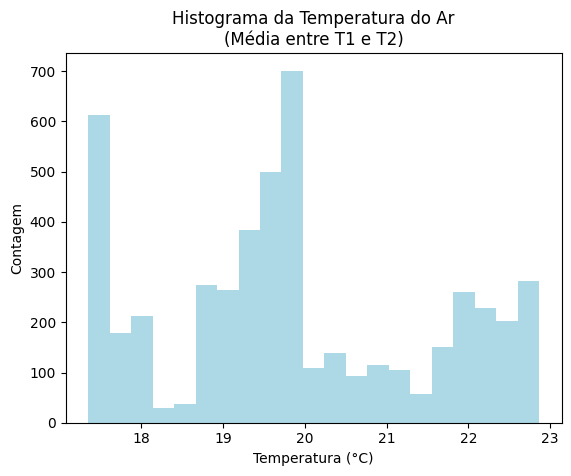

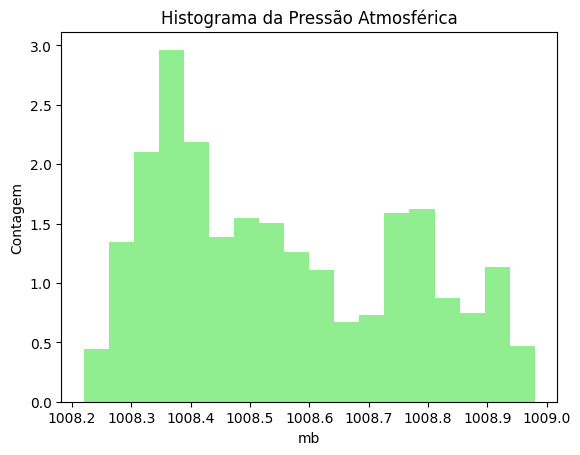

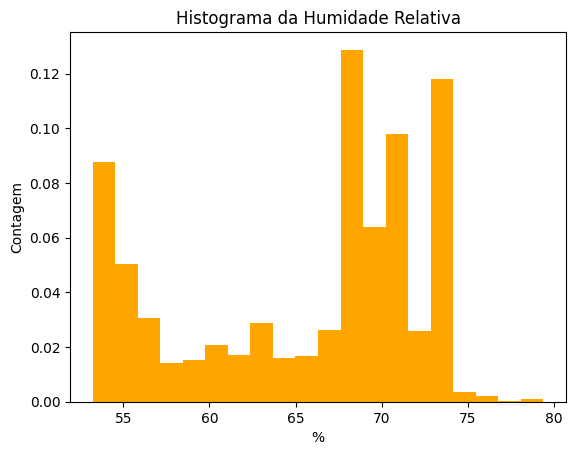

In [130]:
avg_array = []

count = 0

for t in t1:
    avg = (t1[count] + t2[count]) / 2
    avg_array.append(avg)
    count +=1


plt.title('Histograma da Temperatura do Ar\n(Média entre T1 e T2)')
plt.xlabel("Temperatura ("+C+")")
plt.ylabel('Contagem')
plt.hist(avg_array, bins='auto', density=False, facecolor='lightblue', histtype="stepfilled", alpha=1)
plt.show()

plt.title('Histograma da Pressão Atmosférica')
plt.xlabel("mb")
plt.ylabel('Contagem')
plt.hist(p, bins='auto', density=True, facecolor='lightgreen', histtype="stepfilled", alpha=1)
plt.show()

plt.title('Histograma da Humidade Relativa')
plt.xlabel("%")
plt.ylabel('Contagem')
plt.hist(hr, bins='auto', density=True, facecolor='orange', histtype="stepfilled", alpha=1)
plt.show()

### **8.4.** Escrita de informação para ficheiro
Toda a informação relevante para a caracterização dos dados adquiridos será armazenada para um ficheiro designado por "report_parte2.txt".

In [131]:
import pathlib

txtFile = open("report_parte2.txt", "w")        # Ficheiro "report_parte2.txt" guardado na localização onde se encontra este ficheiro de Jupyter Notebook ('fac-lab_17646.ipynb')

arr_titles = ["Mínimo: ", "Máximo: ", "Média: ", "Mediana: ", "Desvio Padrão: "]
t1_values = [np.min(t1), np.max(t1), np.average(t1), np.median(t1), np.std(t1)]
t2_values = [np.min(t2), np.max(t2), np.average(t2), np.median(t2), np.std(t2)]
p_values = [np.min(p), np.max(p), np.average(p), np.median(p), np.std(p)]
hr_values = [np.min(hr), np.max(hr), np.average(hr), np.median(hr), np.std(hr)]

count = 0

for x in arr_titles:
    txtFile.writelines(x)
    txtFile.writelines("\n")
    txtFile.writelines("(T1)" + str(t1_values[count]) + "\t" + "(T2)" + str(t2_values[count]) + "\t" +
     "(P)" + str(p_values[count]) + "\t" + "(HR)" + str(hr_values[count]))
    txtFile.writelines("\n\n")
    count += 1

print("Dados Guardados com Sucesso no ficheiro 'report_parte2.txt'")
print("Caminho: ", pathlib.Path().resolve())    # Mostrar localização onde o ficheiro será guardado por default, na máquina do utilizador atual
txtFile.close()

Dados Guardados com Sucesso no ficheiro 'report_parte2.txt'
Caminho:  C:\Users\fabix\Desktop\FAC\Trabalho


### **9.** Correlação entre grandezas

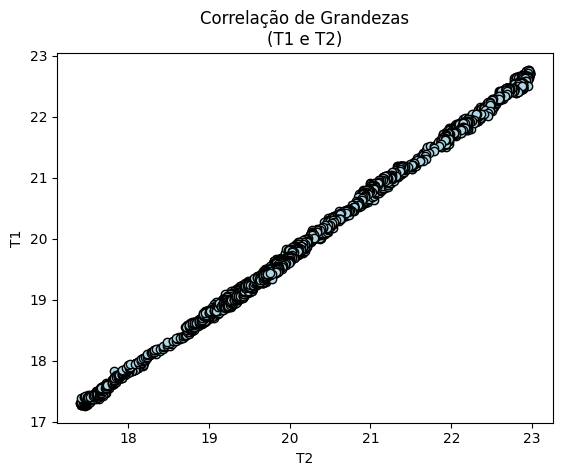

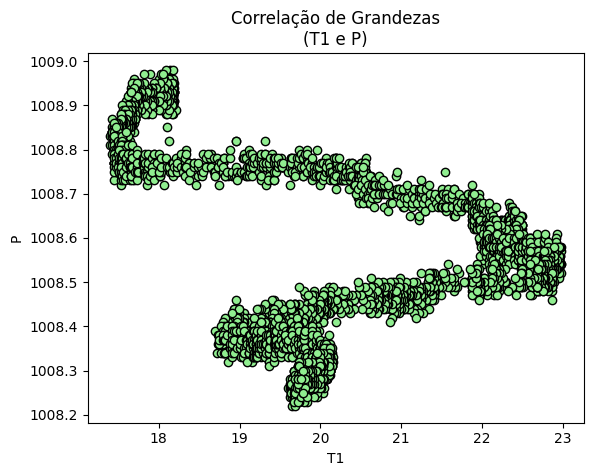

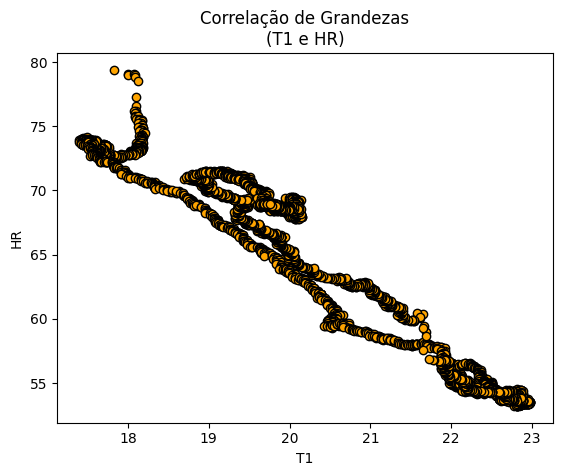

In [132]:
plt.ylabel("T1")
plt.xlabel("T2")
plt.title("Correlação de Grandezas\n(T1 e T2)")
scatter = plt.scatter(t1, t2, facecolors='lightblue', edgecolors='black')
plt.show()

plt.ylabel("P")
plt.xlabel("T1")
plt.title("Correlação de Grandezas\n(T1 e P)")
scatter = plt.scatter(t1, p, facecolors='lightgreen', edgecolors='black')
plt.show()

plt.ylabel("HR")
plt.xlabel("T1")
plt.title("Correlação de Grandezas\n(T1 e HR)")
scatter = plt.scatter(t1, hr, facecolors='orange', edgecolors='black')
plt.show()

## Conclusões Finais
Após a conclusão deste laboratório concluí que aprofundei melhor os conhecimentos que tinha previamente em relação a Python e na elaboração deste projeto utilizando o Jupyter Notebook e especialmente no que toca à implementação de código em C para o Arduino, visto que não tinha muitos conhecimentos no que toca a trabalhar com o Arduino em geral.\
Foi um projeto em que foram superados alguns obstáculos que conseguiram ser superados, quer sejam problemas na porta série de comunicação do Arduino estarem constantemente a serem fechados ou o IDE não detectar o próprio Arduino, como também alguns erros de sintaxe, mas que no fim consegui resolver todos esses erros e entender o porquê dos mesmos.\
Por fim, penso que foi um trabalho bem executado em que consegui cumprir os objetivos propostos no enunciado e penso que este projeto tenha ficado bastante bem implementado e foi um grande desafio que me fez obter melhores conhecimentos no que toca à linguagem de Python e C, compreender o propósito e funcionamento do Arduino e a desenvolver um documento computacional através do Jupyter Notebook.

## Referências

https://cms.ipbeja.pt/mod/folder/view.php?id=110848

https://cms.ipbeja.pt/mod/folder/view.php?id=213295

https://docs.jupyter.org/en/latest/

https://pythonforundergradengineers.com/python-arduino-LED.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

https://www.naukri.com/learning/articles/working-with-date-and-time-in-pandas/

https://docs.python.org/3/library/pathlib.html